# ***** The notebook contains the driver code to train NN on MNIST dataset *****

The model used in this notebook consists of the 4 different steps collectively as one that were discussed in the session: <br>
   - Setup
   - Basic Skeleton
   - Lighter Model
   - Batch Normalization

1. **Target**
     * Set the transforms (converting to tensor and normalization) and data loader
     * Set other basic working code to display sample/plots and model summary
     * Set optimizer, training and testing loops.
     * Design the basic skeleton right to have minimal changes afterwards.
     * Make the model lighter in terms of number of parameters.
     * Add Batch-norm to increase model efficiency.


2. **Result**
     * Parameters: 7547
     * Best Training Accuracy: 99.75% (15th epoch)
     * Best Testing Accuracy: 99.31% (13th epoch)


3. **Analysis**
     * The model (Model_1) we have created for *step1* with ~7.6k paramaters is overall a good light model which is able to achieve 99.15% testing accuracy after 15 epochs with best at 99.31% in 13th epoch.
     * From the training and testing accuracy achieved by the model, we can conclude that the model is overfitting the data as from 5th epoch onwards, training accuracy is more testing accuracy respectively *(Regularization is needed).
     * If we push the current model further, it is unlikely to reach the testing accuracy of 99.40% without any overfitting.

## Code Block 1

In [ ]:
############################ Load required libraries ############################
import torch
from torchsummary import summary
import matplotlib.pyplot as plt

# Load Model configuration
from models import Model_1
# Load necessary functions
from utils import  *



################################ Hyperparamters ################################




# variables to store data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

# Define hyperparameters
batch_size = 256          # Define the batch size for data loading
lr = 0.01                 # Define learning rate value
momentum = 0.9            # Define momentum value
criterion_name = "nll_loss"       # Define criterion name
num_epochs = 15                   # Number of epochs for training
optimizer_algo = "SGD"            # Define optimizer name


# Create a dictionary of keyword arguments (kwargs) for DataLoader
kwargs = {
    'batch_size': batch_size,   # Set the batch size for each batch of data
    'shuffle': True,            # ensures that the model encounters a diverse mix of data during training, leading to better learning and generalization (during testing, the order of data doesn’t impact the model’s predictions)
    'num_workers': 2,           # Number of worker threads for data loading ( each worker will deal with batchsize/num_workers set of data under a batch) # parallel processing-> reduces overall time
    'pin_memory': True          # Enable pinning memory for faster GPU transfer
}

torch.manual_seed(4)

## Code Block 2

In [ ]:
# check if CUDA is available or not
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
device = torch.device("cuda" if cuda else "cpu")       #setting the device on which computations will be executed
print("Device set to: ",device)

CUDA Available? True
Device set to:  cuda


In [ ]:
## see the source function
# get_MNISTdataset_with_loader??
Model_1()

Model_1(
  (convblock1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (1): ReLU()
    (2): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (convblock2): Sequential(
    (0): Conv2d(10, 21, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (1): ReLU()
    (2): BatchNorm2d(21, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (convblock3): Sequential(
    (0): Conv2d(21, 9, kernel_size=(1, 1), stride=(1, 1), bias=False)
  )
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (convblock4): Sequential(
    (0): Conv2d(9, 12, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (1): ReLU()
    (2): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (convblock5): Sequential(
    (0): Conv2d(12, 16, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (1): ReLU()
    (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, tra

## Code Block 3

In [ ]:
## Get MNIST dataset and pass it to loader

test_loader  = get_MNISTdataset_with_loader('test',1,kwargs)   # load test data
train_loader = get_MNISTdataset_with_loader('train',1,kwargs)  # load train data


Testing data loaded successfully...
Training data loaded successfully...


## Code Block 4

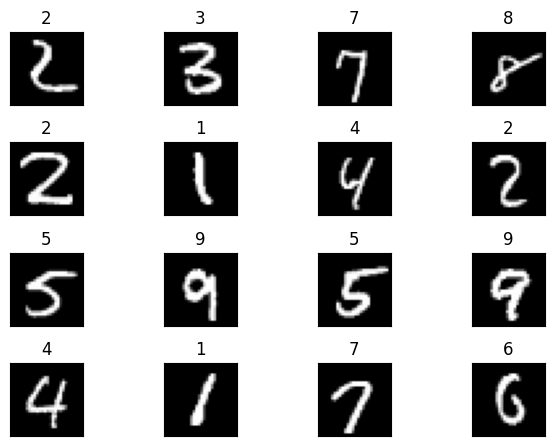

In [ ]:
################ Display a sample of data from the training dataset #####################
post_display(train_loader)

## Code Block 5

In [ ]:
# Initialize the model and move it to the device ( GPU )
model = Model_1().to(device)

#Get summary of model
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
              ReLU-2           [-1, 10, 26, 26]               0
       BatchNorm2d-3           [-1, 10, 26, 26]              20
            Conv2d-4           [-1, 21, 24, 24]           1,890
              ReLU-5           [-1, 21, 24, 24]               0
       BatchNorm2d-6           [-1, 21, 24, 24]              42
            Conv2d-7            [-1, 9, 24, 24]             189
         MaxPool2d-8            [-1, 9, 12, 12]               0
            Conv2d-9           [-1, 12, 10, 10]             972
             ReLU-10           [-1, 12, 10, 10]               0
      BatchNorm2d-11           [-1, 12, 10, 10]              24
           Conv2d-12             [-1, 16, 8, 8]           1,728
             ReLU-13             [-1, 16, 8, 8]               0
      BatchNorm2d-14             [-1, 1

In [ ]:
# get_optimizer??

## Code Block 6

In [ ]:
####################################################### Train Model#####################################################

# Set up the optimizer with stochastic gradient descent with learning rate and momentum
optimizer = get_optimizer(model,optimizer_algo, lr, momentum)

# Define the loss function as negative log likelihood loss.
criterion = get_loss(criterion_name)


print(f"The current learning rate is: {[lr]}")
# Loop over the dataset multiple times, once for each epoch
for epoch in range(1, num_epochs+1):
  # Print the current epoch number
  print(f'Epoch {epoch}')

  # Call the train function, passing in the model, device, data loader, optimizer, and loss function
  train(model, device, train_loader, optimizer, criterion,train_losses,train_acc)

  # After training, evaluate the model on the same training data loader (should be test_loader for evaluation)
  test(model, device, test_loader, criterion,test_losses,test_acc)  # Note: should ideally be test_loader



The current learning rate is: [0.01]
Epoch 1


Train: Loss=0.0741 Batch_id=234 Accuracy=94.03: 100%|██████████| 235/235 [00:18<00:00, 12.74it/s]


Test set: Average loss: 0.0003, Accuracy: 9786/10000 (97.86%)

Epoch 2


Train: Loss=0.0601 Batch_id=234 Accuracy=98.25: 100%|██████████| 235/235 [00:15<00:00, 15.62it/s]


Test set: Average loss: 0.0002, Accuracy: 9852/10000 (98.52%)

Epoch 3


Train: Loss=0.0069 Batch_id=234 Accuracy=98.60: 100%|██████████| 235/235 [00:14<00:00, 16.10it/s]


Test set: Average loss: 0.0002, Accuracy: 9884/10000 (98.84%)

Epoch 4


Train: Loss=0.0488 Batch_id=234 Accuracy=98.87: 100%|██████████| 235/235 [00:15<00:00, 14.84it/s]


Test set: Average loss: 0.0001, Accuracy: 9890/10000 (98.90%)

Epoch 5


Train: Loss=0.0484 Batch_id=234 Accuracy=98.99: 100%|██████████| 235/235 [00:14<00:00, 15.86it/s]


Test set: Average loss: 0.0001, Accuracy: 9890/10000 (98.90%)

Epoch 6


Train: Loss=0.0947 Batch_id=234 Accuracy=99.15: 100%|██████████| 235/235 [00:14<00:00, 15.69it/s]


Test set: Average loss: 0.0001, Accuracy: 9891/10000 (98.91%)

Epoch 7


Train: Loss=0.0144 Batch_id=234 Accuracy=99.22: 100%|██████████| 235/235 [00:15<00:00, 15.04it/s]


Test set: Average loss: 0.0001, Accuracy: 9912/10000 (99.12%)

Epoch 8


Train: Loss=0.0221 Batch_id=234 Accuracy=99.31: 100%|██████████| 235/235 [00:14<00:00, 16.30it/s]


Test set: Average loss: 0.0001, Accuracy: 9925/10000 (99.25%)

Epoch 9


Train: Loss=0.0076 Batch_id=234 Accuracy=99.40: 100%|██████████| 235/235 [00:15<00:00, 15.31it/s]


Test set: Average loss: 0.0001, Accuracy: 9915/10000 (99.15%)

Epoch 10


Train: Loss=0.0097 Batch_id=234 Accuracy=99.50: 100%|██████████| 235/235 [00:14<00:00, 16.32it/s]


Test set: Average loss: 0.0001, Accuracy: 9914/10000 (99.14%)

Epoch 11


Train: Loss=0.0278 Batch_id=234 Accuracy=99.51: 100%|██████████| 235/235 [00:14<00:00, 16.01it/s]


Test set: Average loss: 0.0001, Accuracy: 9918/10000 (99.18%)

Epoch 12


Train: Loss=0.0048 Batch_id=234 Accuracy=99.54: 100%|██████████| 235/235 [00:15<00:00, 14.98it/s]


Test set: Average loss: 0.0001, Accuracy: 9916/10000 (99.16%)

Epoch 13


Train: Loss=0.0173 Batch_id=234 Accuracy=99.64: 100%|██████████| 235/235 [00:15<00:00, 15.56it/s]


Test set: Average loss: 0.0001, Accuracy: 9931/10000 (99.31%)

Epoch 14


Train: Loss=0.0097 Batch_id=234 Accuracy=99.66: 100%|██████████| 235/235 [00:15<00:00, 15.61it/s]


Test set: Average loss: 0.0001, Accuracy: 9929/10000 (99.29%)

Epoch 15


Train: Loss=0.0127 Batch_id=234 Accuracy=99.75: 100%|██████████| 235/235 [00:14<00:00, 15.69it/s]


Test set: Average loss: 0.0001, Accuracy: 9910/10000 (99.10%)



## Code Block 7

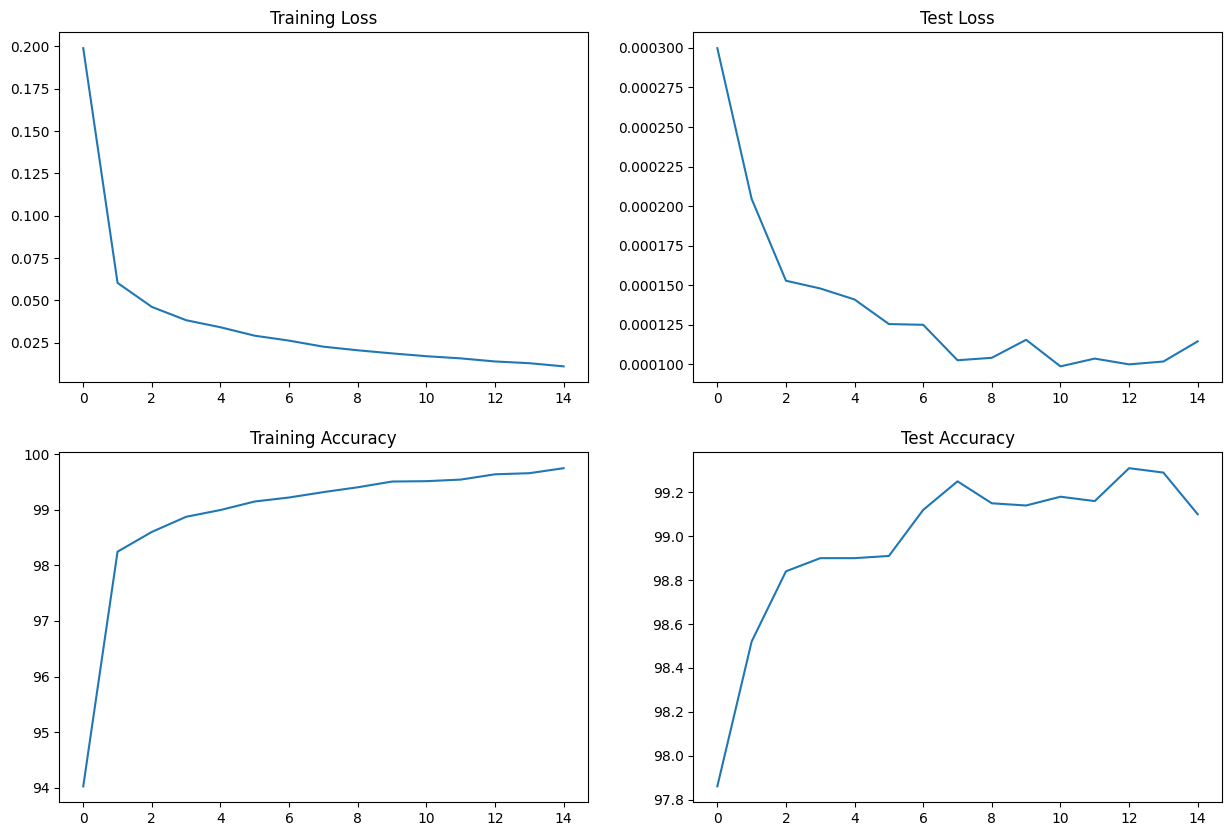

In [ ]:
# Plot accuracy and loss
post_accuracyplots(train_losses,test_losses,train_acc,test_acc)